## Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import textacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lettings = pd.read_csv('clean_lettings_with_price')

In [3]:
lettings.dropna(inplace=True)

In [4]:
lettings.shape

(1560, 10)

In [5]:
analyzer = SentimentIntensityAnalyzer()

In [6]:
vader_scores = lettings['reviews'].map(analyzer.polarity_scores)

In [7]:
vader_scores.head()

0    {'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...
1    {'neg': 0.007, 'neu': 0.675, 'pos': 0.318, 'co...
2    {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp...
3    {'neg': 0.014, 'neu': 0.721, 'pos': 0.265, 'co...
4    {'neg': 0.0, 'neu': 0.692, 'pos': 0.308, 'comp...
Name: reviews, dtype: object

In [8]:
from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

<1560x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6240 stored elements in Compressed Sparse Row format>

In [9]:
dvec.feature_names_

['compound', 'neg', 'neu', 'pos']

In [10]:
for i, col in enumerate(dvec.feature_names_):
    lettings['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

In [11]:
lettings.head()

,title,reviews,rating,number_of_reviews,accomodation_type,guests,beds,bathrooms,price,amenities,vader_compound,vader_neg,vader_neu,vader_pos
0,The Studio in West Ealing London,['Jessica April 2020 A very compact space clos...,4.69,275.0,Entire guest suite,2,1,1.0,45,28,0.9913,0.000,0.618,0.382
1,LAST MINUTE - SINGLE ROOM,['Richard March 2020 All you need for a stay. ...,4.87,164.0,Private room in house,1,1,2.0,29,25,0.9925,0.007,0.675,0.318
2,Homely room in leafy Ealing.,['Brian March 2020 Second time staying with Ti...,4.75,333.0,Private room in house,1,1,1.0,29,17,0.9889,0.000,0.561,0.439
3,"Small single room, West London, budget travel!","[""Czarek February 2020 Another great stay at R...",4.68,28.0,Private room in house,1,1,1.0,21,26,0.9583,0.014,0.721,0.265
4,Cosy Double Room,['Dory March 2020 Perfect Dory February 2020 E...,4.78,39.0,Private room in house,1,1,1.5,21,17,0.9781,0.000,0.692,0.308


In [12]:
X = lettings[['vader_neg', 'vader_pos', 'vader_neu', 'vader_compound']].astype(float)
y = lettings['price']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print("Training Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Mean cross-validated training score:", scores.mean())

Training Score: 0.0019544332198629943
Test Score: -0.005128742262104913
Mean cross-validated training score: -0.011566844888315674


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [18]:
dtr = DecisionTreeRegressor(random_state=1, max_depth = 3)

dtr.fit(X_train, y_train)

print(dtr.score(X_test, y_test))

dtr_scores = cross_val_score(dtr, X_train, y_train, cv=5)

print(dtr_scores)
print(np.mean(dtr_scores))

0.019501887665848927
[ 0.01204017 -0.0281111   0.05386346  0.05639632 -0.0064483 ]
0.017548108807114306


## Adding the nlp of the reviews column with tvec

In [19]:
lettings.head()

,title,reviews,rating,number_of_reviews,accomodation_type,guests,beds,bathrooms,price,amenities,vader_compound,vader_neg,vader_neu,vader_pos
0,The Studio in West Ealing London,['Jessica April 2020 A very compact space clos...,4.69,275.0,Entire guest suite,2,1,1.0,45,28,0.9913,0.000,0.618,0.382
1,LAST MINUTE - SINGLE ROOM,['Richard March 2020 All you need for a stay. ...,4.87,164.0,Private room in house,1,1,2.0,29,25,0.9925,0.007,0.675,0.318
2,Homely room in leafy Ealing.,['Brian March 2020 Second time staying with Ti...,4.75,333.0,Private room in house,1,1,1.0,29,17,0.9889,0.000,0.561,0.439
3,"Small single room, West London, budget travel!","[""Czarek February 2020 Another great stay at R...",4.68,28.0,Private room in house,1,1,1.0,21,26,0.9583,0.014,0.721,0.265
4,Cosy Double Room,['Dory March 2020 Perfect Dory February 2020 E...,4.78,39.0,Private room in house,1,1,1.5,21,17,0.9781,0.000,0.692,0.308


In [20]:
X = lettings.reviews

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words = 'english', strip_accents = 'ascii', max_features = 5000, ngram_range=(1,2))
X_reviews = tvec.fit(X)

X_reviews = pd.DataFrame(tvec.transform(X).todense(), columns=tvec.get_feature_names())

In [21]:
X_reviews

,02,10,10 10,10 15,10 days,10 min,10 mins,10 minute,10 minutes,10 recommend,...,youll,young,youre,youre looking,yuan,yuan march,yvonne,zahir,zia,zoe
0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1556,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1557,0.0,0.055434,0.0,0.0,0.0,0.08783,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1558,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [22]:
sent_analysis = lettings[['vader_neg', 'vader_pos', 'vader_neu', 'vader_compound']].astype(float)

In [23]:
X_new = pd.concat([X_reviews.reset_index(drop = True), sent_analysis.reset_index(drop = True), 
                   lettings[['number_of_reviews','beds','bathrooms','guests','amenities']].reset_index(drop=True)], axis=1)

In [24]:
X_new

,02,10,10 10,10 15,10 days,10 min,10 mins,10 minute,10 minutes,10 recommend,...,zoe,vader_neg,vader_pos,vader_neu,vader_compound,number_of_reviews,beds,bathrooms,guests,amenities
0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.382,0.618,0.9913,275.0,1,1.0,2,28
1,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.007,0.318,0.675,0.9925,164.0,1,2.0,1,25
2,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.439,0.561,0.9889,333.0,1,1.0,1,17
3,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.014,0.265,0.721,0.9583,28.0,1,1.0,1,26
4,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.308,0.692,0.9781,39.0,1,1.5,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.010,0.193,0.797,0.9853,11.0,1,1.0,2,16
1556,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.050,0.190,0.761,0.9819,8.0,2,1.0,2,21
1557,0.0,0.055434,0.0,0.0,0.0,0.08783,0.0,0.0,0.0,0.0,...,0.000000,0.007,0.211,0.782,0.9892,10.0,3,1.0,3,15
1558,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.015,0.223,0.763,0.9909,37.0,2,1.0,2,16


In [25]:
X = lettings.title

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(stop_words = 'english', strip_accents = 'ascii', max_features = 5000, ngram_range=(1,2))
X_title = tvec.fit(X)

X_title = pd.DataFrame(tvec.transform(X).todense(), columns=tvec.get_feature_names())

In [26]:
X = lettings.accomodation_type

X = pd.get_dummies(X, drop_first=True)

In [27]:
X_new = pd.concat([X_new.reset_index(drop = True),lettings[['rating']]], axis=1)

In [28]:
y = lettings['price']

In [29]:
print(X_new.shape, y.shape)

(1560, 5010) (1560,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

In [31]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_new.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_new.columns)

In [32]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print("Training Score:", lr.score(X_train, y_train))
print("Test Score:", lr.score(X_test, y_test))

scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Mean cross-validated training score:", scores.mean())

Training Score: 1.0
Test Score: 0.4730941273352185
Mean cross-validated training score: 0.5615667019364512


In [33]:
dtr = DecisionTreeRegressor(random_state=1, max_depth = 3)

dtr.fit(X_train, y_train)

print(dtr.score(X_test, y_test))

dtr_scores = cross_val_score(dtr, X_train, y_train, cv=5)

print(dtr_scores)
print(np.mean(dtr_scores))

0.42087719296422293
[0.48610832 0.51302321 0.56928845 0.45644305 0.42947914]
0.49086843250241186


In [34]:
l1_ratios = np.linspace(0.01, 1, 10)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=5,
                            verbose=1, n_jobs=-1, max_iter=10000)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.46272746775636164
0.67


In [35]:
optimal_enet.score(X_test, y_test)

0.5500946105252724

In [36]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_, max_iter=10000)
enet.fit(X_train, y_train)

enet_scores = cross_val_score(enet, X_train, y_train, cv=5)

print(enet_scores)
print(np.mean(enet_scores))

[0.5527679  0.66595614 0.62351131 0.60852449 0.55668725]
0.6014894168426169


## Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
reg = GradientBoostingRegressor(random_state=1)
reg.fit(X_train, y_train)

reg_scores = cross_val_score(reg, X_train, y_train, cv=5)

print(reg_scores)
print(np.mean(reg_scores))

[0.62691042 0.70556543 0.70951625 0.69069058 0.68163328]
0.6828631900872795


In [ ]:
## TEST MORE

In [39]:
for i in range(1, 10):
    reg = GradientBoostingRegressor(random_state=1, max_depth=i)
    reg.fit(X_train, y_train)

    reg_scores = cross_val_score(reg, X_train, y_train, cv=5)


    print(i, np.mean(reg_scores))

1 0.5317869946873317
2 0.6439264521048627
3 0.6828631900872795
4 0.6971999500487973
5 0.7032429091153876
6 0.6963276528420289
7 0.6718522158929963


KeyboardInterrupt: 

In [40]:
for i in ['auto', 'sqrt', 'log2']:
    reg = GradientBoostingRegressor(random_state=1, max_depth=5, max_features=i)
    reg.fit(X_train, y_train)

    reg_scores = cross_val_score(reg, X_train, y_train, cv=5)


    print(i, np.mean(reg_scores))


auto 0.7032429091153876
sqrt 0.5895923007570946
log2 0.3796301937841502


In [41]:
for i in np.linspace(0.1,1,10):
    reg = GradientBoostingRegressor(random_state=1, max_depth=5, max_features='auto', loss='huber', alpha=i)
    reg.fit(X_train, y_train)

    reg_scores = cross_val_score(reg, X_train, y_train, cv=5)


    print(i, np.mean(reg_scores))


0.1 0.6224060762782555
0.2 0.6181693472254156
0.30000000000000004 0.621320514076813
0.4 0.6318087818152428
0.5 0.6327479567552036
0.6 0.6508953953696052
0.7000000000000001 0.656001495729259
0.8 0.6593260699648882


KeyboardInterrupt: 

In [42]:
for i in np.linspace(0.1,0.2,10):
    reg = GradientBoostingRegressor(random_state=1, max_depth=5, max_features='auto', loss = 'ls', learning_rate=i)
    reg.fit(X_train, y_train)

    reg_scores = cross_val_score(reg, X_train, y_train, cv=5)


    print(i, np.mean(reg_scores))



0.1 0.7032429091153876
0.11111111111111112 0.7019903582589667
0.12222222222222223 0.7035067598376663
0.13333333333333333 0.7050998877637891
0.14444444444444446 0.7060833083935805
0.15555555555555556 0.7054341680635335
0.16666666666666669 0.6994761787878694
0.17777777777777778 0.7076296521319103
0.18888888888888888 0.7081401741946046
0.2 0.699537207729261


In [47]:
model = GradientBoostingRegressor(random_state=1)

params = {
    'n_estimators' : [1000],
    'max_depth' : [2,3,4,5,6,7,8,9],
    'max_features': ('auto', 'sqrt', 'log2'),
    'loss': ('ls','huber')
}


gs = GridSearchCV(model, params, n_jobs=-1, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 32.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...e,
                          

In [48]:
gs.best_score_

0.7121157526831801

In [49]:
gs.best_params_

{'loss': 'ls', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 1000}

In [57]:
model = GradientBoostingRegressor(random_state=1)

params = {
    'n_estimators' : [1000],
    'max_depth' : [5],
    'max_features': ['auto'],
    'loss': ['ls'],
    'learning_rate': np.linspace(0.1,0.2,10)
}


gs = GridSearchCV(model, params, n_jobs=-1, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [58]:
gs.best_score_

0.712734368239967

In [59]:
gs.best_params_

{'learning_rate': 0.14444444444444446,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 1000}

In [60]:
reg = GradientBoostingRegressor(random_state=1, max_depth=5, max_features='auto', loss = 'ls', learning_rate=0.1444444)
reg.fit(X_train, y_train)

reg_scores = cross_val_score(reg, X_train, y_train, cv=5)

In [99]:
reg_scores.mean()

0.7064553814122059

In [100]:
predictions = reg.predict(X_test)

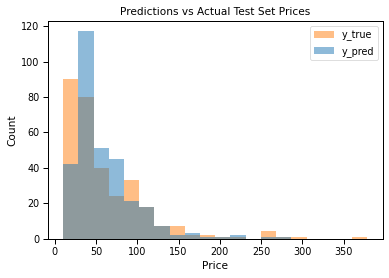

In [102]:
plt.hist([predictions, y_test], bins=20, histtype='stepfilled', alpha=0.5)
plt.legend(['y_true', 'y_pred'])
plt.title('Predictions vs Actual Test Set Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

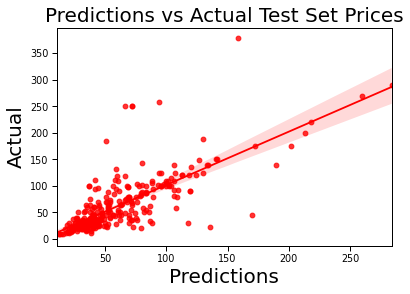

In [103]:
sns.regplot(x = predictions, y = y_test, color='r')
plt.title('Predictions vs Actual Test Set Prices', fontsize=20)
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()

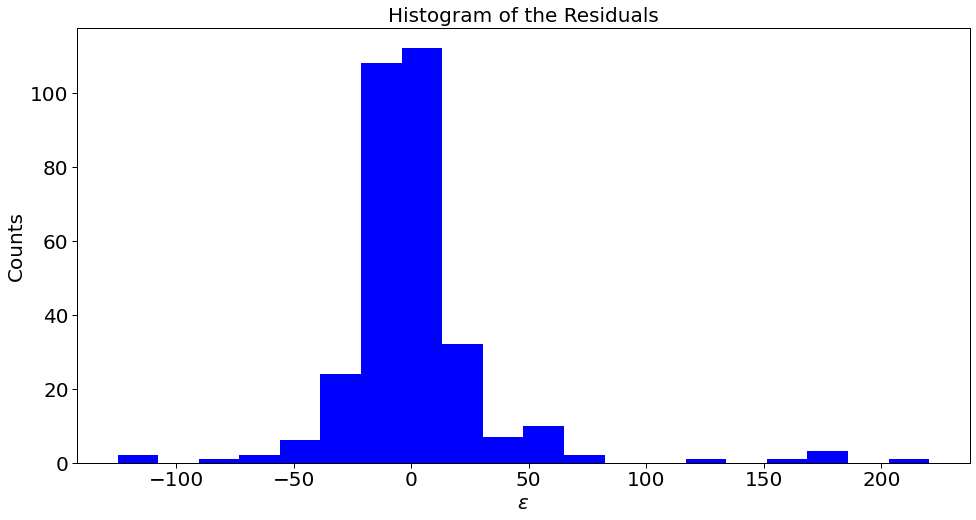

In [106]:
fig, ax = plt.subplots(figsize=(16, 8))

residuals = y_test - predictions
ax.hist(residuals, bins=20, color='b', )
ax.set_xlabel(r'$\epsilon$', fontsize=20)
ax.tick_params(axis='both', labelsize=20)
plt.title('Histogram of the Residuals', fontsize=20)
plt.ylabel('Counts', fontsize=20);

## Neural Net

In [64]:
from sklearn.neural_network import MLPRegressor

In [67]:
nnet = MLPRegressor(hidden_layer_sizes=(8, 8, 8),
                    solver='lbfgs', activation='relu', random_state=1, max_iter = 10000)
nnet.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [68]:
print(nnet.score(X_train, y_train))
print(nnet.score(X_test, y_test))

0.9991503516303615
0.4641778413924936


## Support Vector

In [69]:
from sklearn.svm import SVR

In [70]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm = SVR(kernel = i)
    svm.fit(X_train, y_train)

    svm_scores = cross_val_score(svm, X_train, y_train, cv=5)


    print(i, np.mean(svm_scores))

linear 0.5657553327319225
poly -0.09430701116013274


KeyboardInterrupt: 

In [72]:
model = SVR()

params = {
    'kernel' : ['linear'],
    'gamma': ('auto', 'scale'),
    'C': np.linspace(0.1,1,10),
    'epsilon': np.linspace(0.1,1,10)
}


gs = GridSearchCV(model, params, n_jobs=-1, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 27.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'gamma': ('auto', 'scale'), 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [73]:
gs.score(X_test, y_test)

0.48795397064149026

In [74]:
gs.best_score_

0.5666546701446723

In [75]:
gs.best_params_

{'C': 0.1, 'epsilon': 1.0, 'gamma': 'auto', 'kernel': 'linear'}

In [79]:
model = SVR()

params = {
    'kernel' : ['linear'],
    'gamma': ['auto'],
    'C': [0.1],
    'epsilon': [1,2,3,4,5]
}


gs = GridSearchCV(model, params, n_jobs=-1, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   47.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1], 'epsilon': [1, 2, 3, 4, 5],
                         'gamma': ['auto'], 'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [80]:
gs.best_score_

0.567653740978001

In [81]:
gs.best_params_

{'C': 0.1, 'epsilon': 3, 'gamma': 'auto', 'kernel': 'linear'}

In [84]:
model = SVR(C=0.1, epsilon=3, gamma='auto', kernel='linear')
model.fit(X_train, y_train)

model_scores = cross_val_score(model, X_train, y_train, cv=5)
print(np.mean(model_scores))

0.567653740978001


Finding the largest coefficients of the SVR model

In [85]:
# collect the model coefficients in a dataframe
df_coef = pd.DataFrame(model.coef_.T, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()
df_coef

,coefficients,coef_abs
02,0.859230,0.859230
10,0.490478,0.490478
10 10,0.396112,0.396112
10 15,-0.290945,0.290945
10 days,-0.298089,0.298089
...,...,...
beds,2.354473,2.354473
bathrooms,0.237233,0.237233
guests,3.986492,3.986492
amenities,1.159444,1.159444


In [97]:
top15coefs = df_coef.sort_values('coef_abs', ascending=False)[:15]

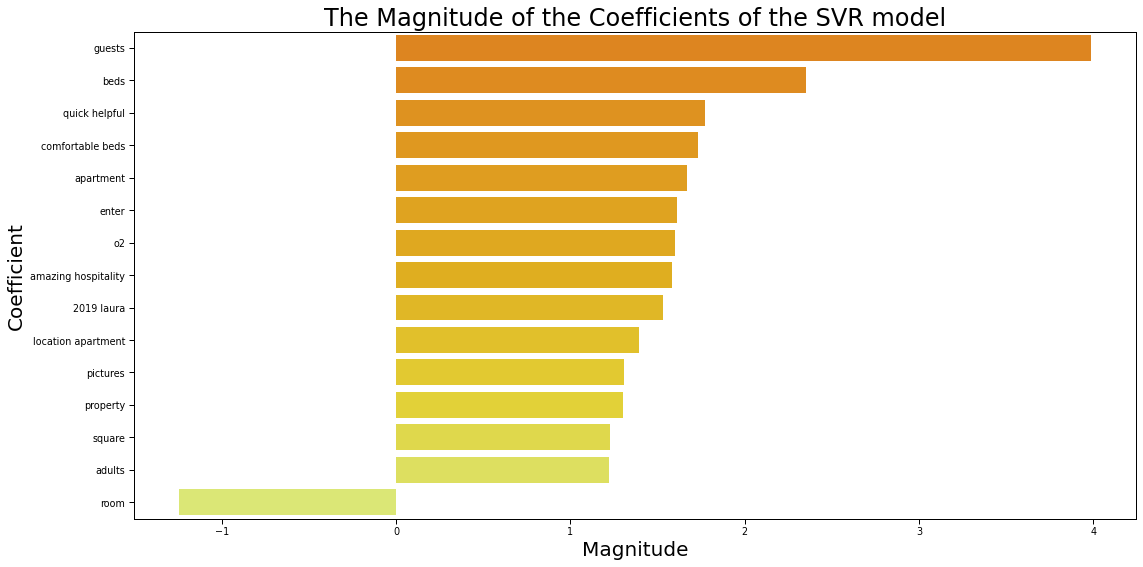

In [98]:
with sns.axes_style({'xtick.color':'black', 'ytick.color':'black', 'axes.grid' : False}):
    fig, ax = plt.subplots(figsize=(16,8))
    sns.set_context("paper", font_scale=1.1)
    sns.barplot(y = 'index', x = 'coefficients', data = top15coefs.reset_index().sort_values(['coefficients'],ascending=False), orient='h', palette = 'Wistia_r')
    plt.xlabel('Magnitude', color = 'k', fontsize=20)
    plt.ylabel('Coefficient', color = 'k', fontsize=20)
    plt.title('The Magnitude of the Coefficients of the SVR model', fontsize=24, color='k')
    plt.tight_layout()